In [1]:
%matplotlib inline
beam_file = '/Users/jburba/hera_things/hera-team/HERA-Beams/NicolasFagnoniBeams/healpix_beam.fits'

### Beam Frequency Structure

Look first at the frequency structure along $\varphi$=0  
Colors mark elevation angle (red = high, blue = horizon)

get_beam_on_grid.py:122: RuntimeWarning: invalid value encountered in log10
  diffim = imshow(10*np.log10(diff_data).reshape([NPIX_SIDE]*2),


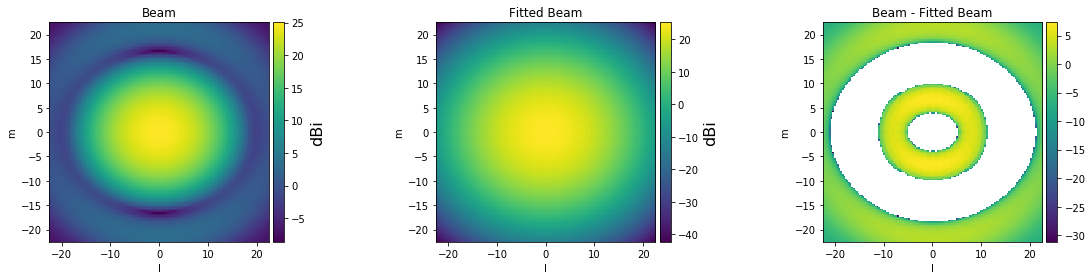

In [3]:
%run get_beam_on_grid.py --npix_side=139 --fov=45 --fit_beam --log_scale

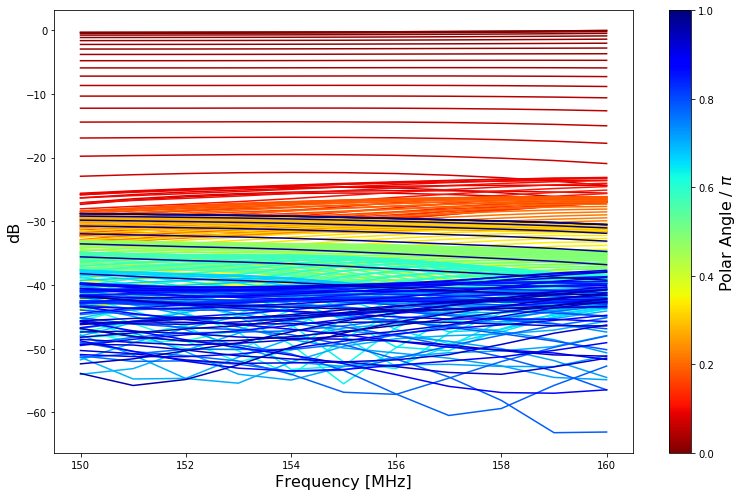

In [4]:
%run plot_beam_freq_variation.py --beam=$beam_file --freq=150-160

Beam normalized to maximum beam amplitude over the bandwidth.

#### Fit each curve above with a quadratic and look at the residuals  
Colors of curves match with above plot

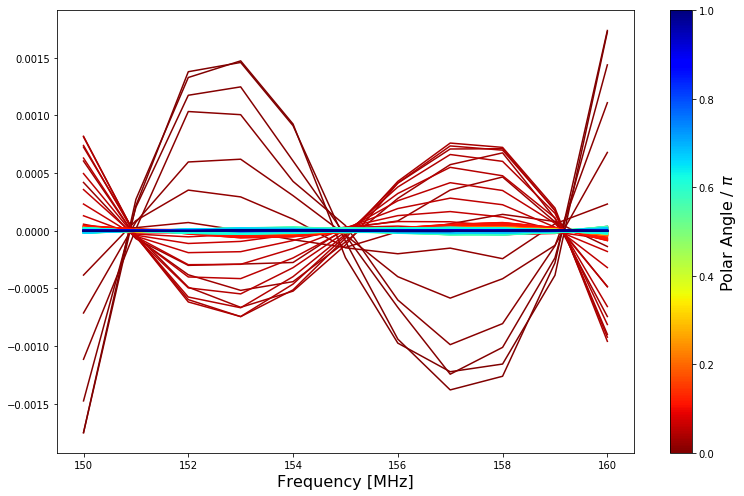

In [41]:
%run plot_beam_freq_variation.py --beam=$beam_file --freq=150-160 --poly_order=2

---

### Maximum Likelihood Frequency Structure

Performs quadratic fits along the frequency axis of a maximum likelihood sky cube with shape (nfreq, nl, nm)

{'rms': 1e-05, 'log_scale': None, 'freq_res': 1.0, 'uniform_sky': None, 'poly_order': '2', 'fov': 10, 'fractional_fit': None, 'npix_side': 31, 'zenith_source': True, 'write': None, 'm_offset': None, 'spec_index': 0.0, 'grid_pos': 'True', 'noise_sky': None, 'rms_data': '', 'fit_beam': True, 'beam': '/Users/jburba/hera_things/hera-team/HERA-Beams/NicolasFagnoniBeams/healpix_beam.fits', 'freq': '150-160', 'l_offset': None, 'horizon_source': None, 'force_lim': None, 'uvdata': None, 'nsources': 1}
Constructing sky...
Constructing visibilities...
Constructing maximum likelihood sky...
Frequency [MHz]:  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160
Performing polynomial fit...
Polynomial order:  2
Plotting...


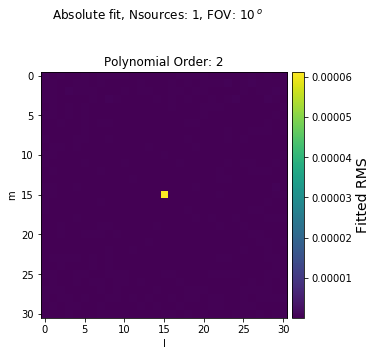

In [16]:
%run fit_maxL_frequency_structure.py --freq=150-160 --zenith_source --beam=$beam_file --fit_beam --poly_order=2



#### The so-called 'absolute' fit  
At each frequency the beam is normalized to one, a Gaussian with amplitude one is fit to the beam, and this fitted Gaussian beam is used to construct the maximum likelihood solution for the sky.

{'rms': 1e-05, 'log_scale': None, 'freq_res': 1.0, 'uniform_sky': True, 'poly_order': '1-5', 'fov': 10, 'fractional_fit': None, 'npix_side': 31, 'zenith_source': None, 'write': None, 'm_offset': None, 'spec_index': 0.0, 'grid_pos': 'True', 'noise_sky': None, 'rms_data': '', 'fit_beam': True, 'beam': '/Users/jburba/hera_things/hera-team/HERA-Beams/NicolasFagnoniBeams/healpix_beam.fits', 'freq': '150-160', 'l_offset': None, 'horizon_source': None, 'force_lim': True, 'uvdata': None, 'nsources': 1}
Constructing sky...
Constructing visibilities...
Constructing maximum likelihood sky...
Frequency [MHz]:  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160
Performing polynomial fit...
Polynomial order:  1,  2,  3,  4,  5
Plotting...


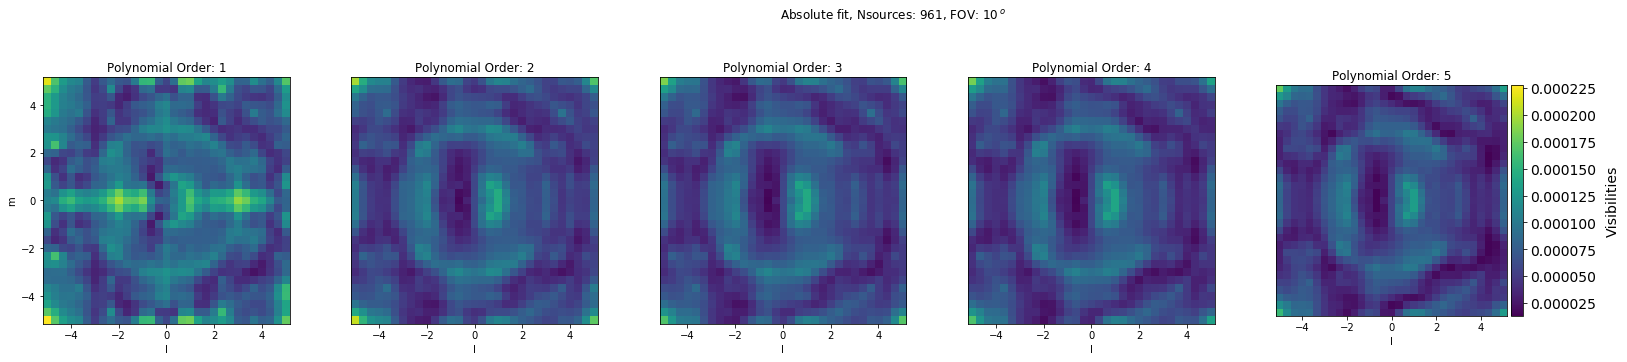

In [43]:
%run fit_maxL_frequency_structure.py --freq=150-160 --beam=$beam_file --fit_beam --poly_order=1-5 --uniform_sky --force_lim



#### The so-called 'fractional' fit  
At each frequency, the beam is normalized to one.  The first frequency is used as the reference frequency and the beam is divided by this reference beam at all subsequent frequencies.

{'rms': 1e-05, 'log_scale': None, 'freq_res': 1.0, 'uniform_sky': True, 'poly_order': '2-5', 'fov': 10, 'fractional_fit': True, 'npix_side': 31, 'zenith_source': None, 'write': None, 'm_offset': None, 'spec_index': 0.0, 'grid_pos': 'True', 'noise_sky': None, 'rms_data': '', 'fit_beam': True, 'beam': '/Users/jburba/hera_things/hera-team/HERA-Beams/NicolasFagnoniBeams/healpix_beam.fits', 'freq': '150-160', 'l_offset': None, 'horizon_source': None, 'force_lim': True, 'uvdata': None, 'nsources': 1}
Constructing sky...
Setting reference beam at 150.000MHz
Constructing visibilities...
Constructing maximum likelihood sky...
Frequency [MHz]:  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160
Performing polynomial fit...
Polynomial order:  2,  3,  4,  5
Plotting...


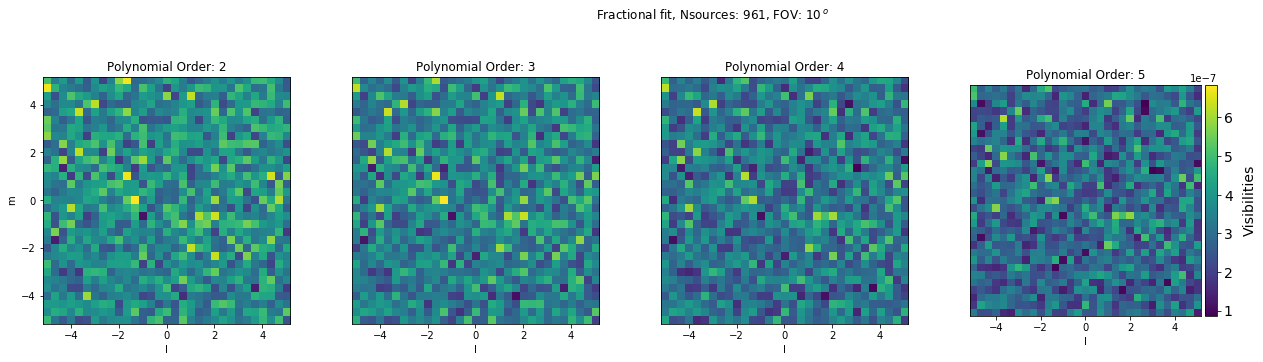

In [25]:
%run fit_maxL_frequency_structure.py --freq=150-160 --beam=$beam_file --fit_beam --poly_order=2-5 --uniform_sky --fractional_fit --force_lim


________________

#### ML Sky calculation for subset of sky based on goodness of fit of the fitted Gaussian beam

  
________________

In [21]:
np.std(a[0])

0.008061813882718014

In [26]:
a.imag.min(), a.imag.max()

(-4.0887165394150215e-15, 4.754251057892774e-15)

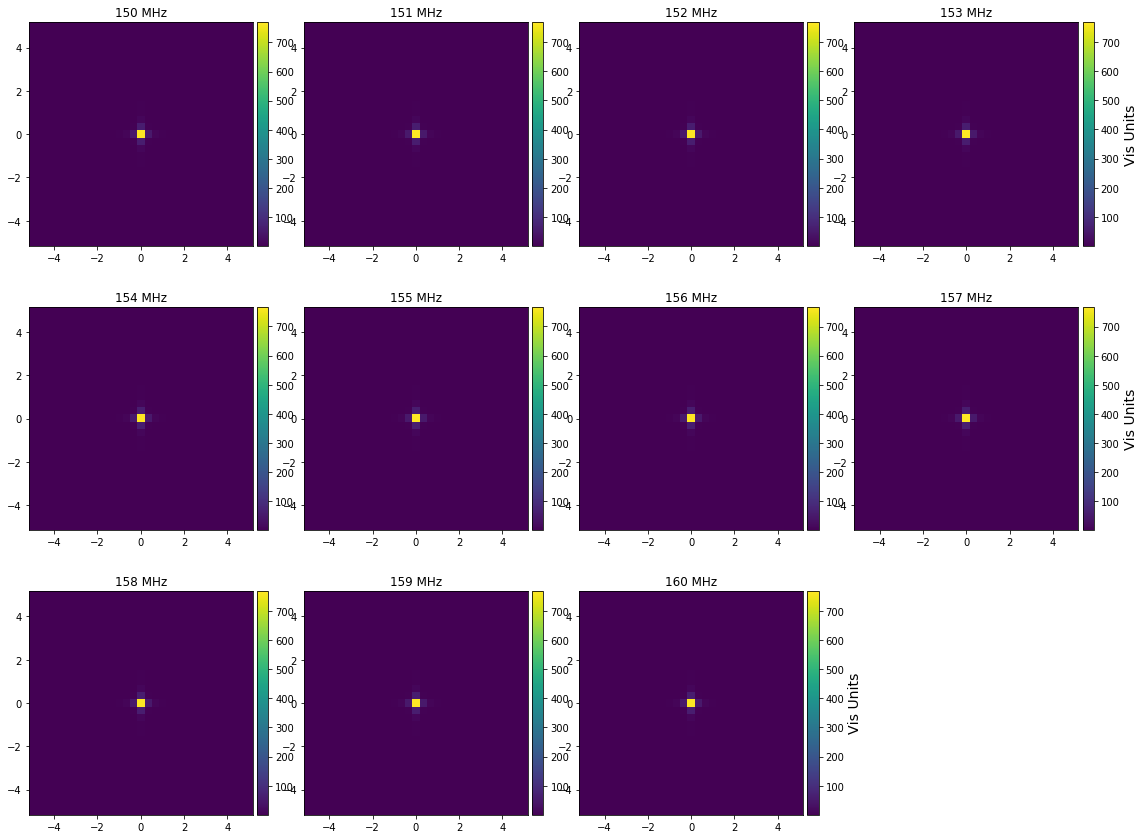

In [39]:
fig = figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4)
imgs = []

for i,freq in enumerate(freqs):
    ax = fig.add_subplot(gs[i])
    imgs.append(ax.imshow(np.abs(Vs)[i].reshape([npix_side]*2), extent=extent_lm))
    ax.set_title('%.0f MHz' %freq)

for i,ax in enumerate(fig.axes):
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cb = fig.colorbar(imgs[i], cax=cax)
    if i in [3, 7, 10]:
        if opts.log_scale:
            cb.set_label('log10(Vis Units)', size=fontsize)
        else:
            cb.set_label('Vis Units', size=fontsize)

gs.tight_layout(fig)
gs.update(wspace=0.15)

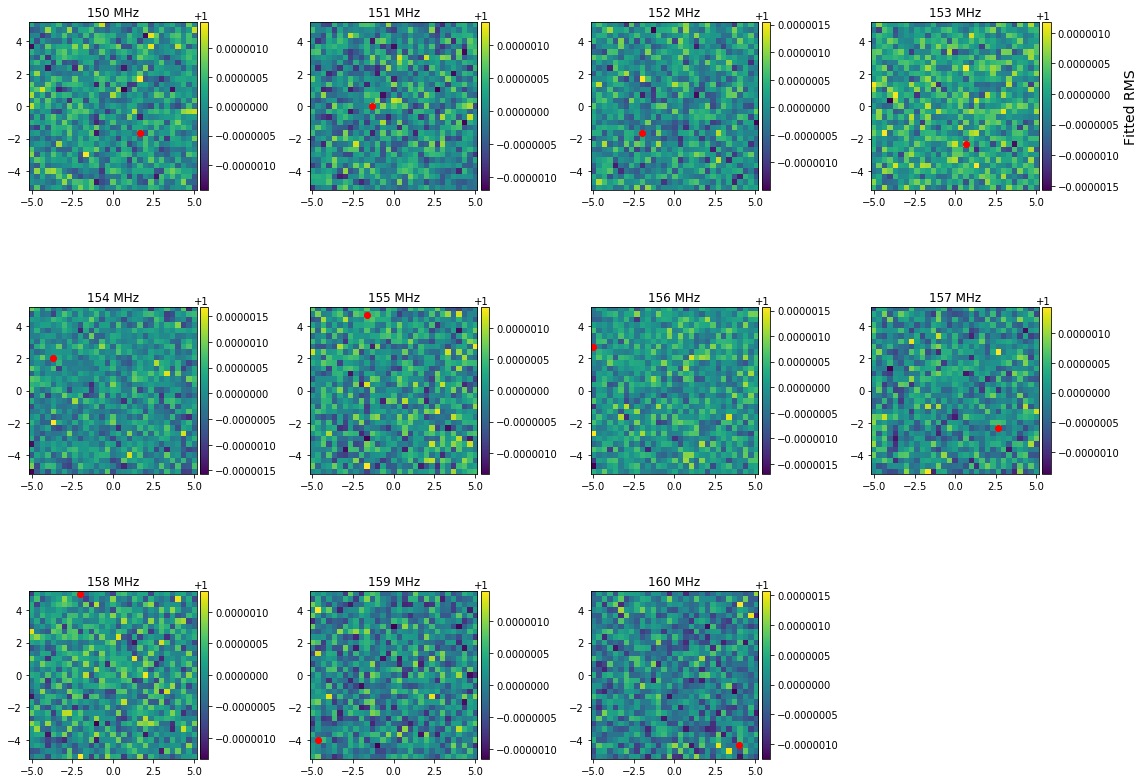

In [29]:
fig = figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4)
imgs = []

for i,freq in enumerate(freqs):
    ax = fig.add_subplot(gs[i])
    imgs.append(ax.imshow(np.abs(a)[i].reshape([npix_side]*2), extent=extent_lm))
    max_ind = np.argmax(np.abs(a)[i])
    row_ind = max_ind/npix_side
    col_ind = max_ind%npix_side
    ax.scatter(np.rad2deg(ls[col_ind]), np.rad2deg(ms[row_ind]), c='r', marker='o')
    ax.set_title('%.0f MHz' %freq)

for i,ax in enumerate(fig.axes):
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cb = fig.colorbar(imgs[i], cax=cax)
    if i == (nplots - 1):
        if opts.log_scale:
            cb.set_label('log10(Fitted RMS)', size=fontsize)
        else:
            cb.set_label('Fitted RMS', size=fontsize)

gs.tight_layout(fig)
# gs.update(wspace=0.25)

In [127]:
beam_grid.shape

(11, 961)

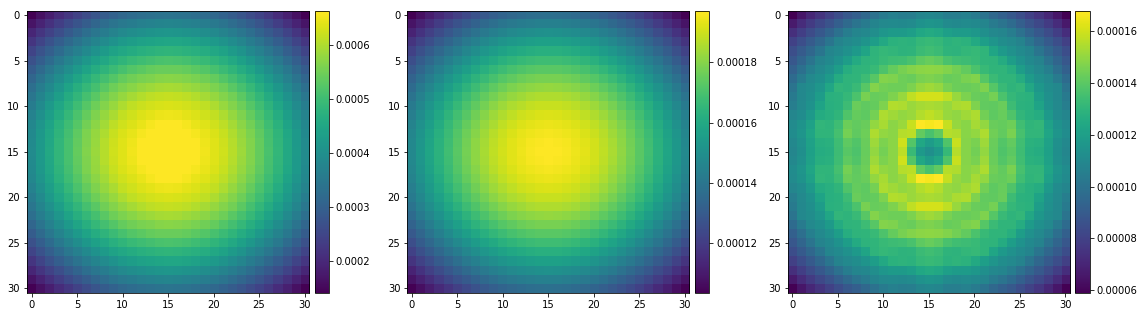

In [131]:

fig = figure(figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0])
ax1.imshow(beam_grid[0].reshape([npix_side]*2), vmax=1.0)

ax2 = fig.add_subplot(gs[1])
ax2.imshow(fit_beam_grid[0].reshape([npix_side]*2))

ax3 = fig.add_subplot(gs[2])
ax3.imshow((beam_grid[0] - fit_beam_grid[0]).reshape([npix_side]*2))

for i,ax in enumerate(fig.axes):
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cb = fig.colorbar(imgs[i], cax=cax)

gs.tight_layout(fig)

In [132]:
fit_beam_grid[0].reshape([npix_side]*2).max()

0.9999995996922574

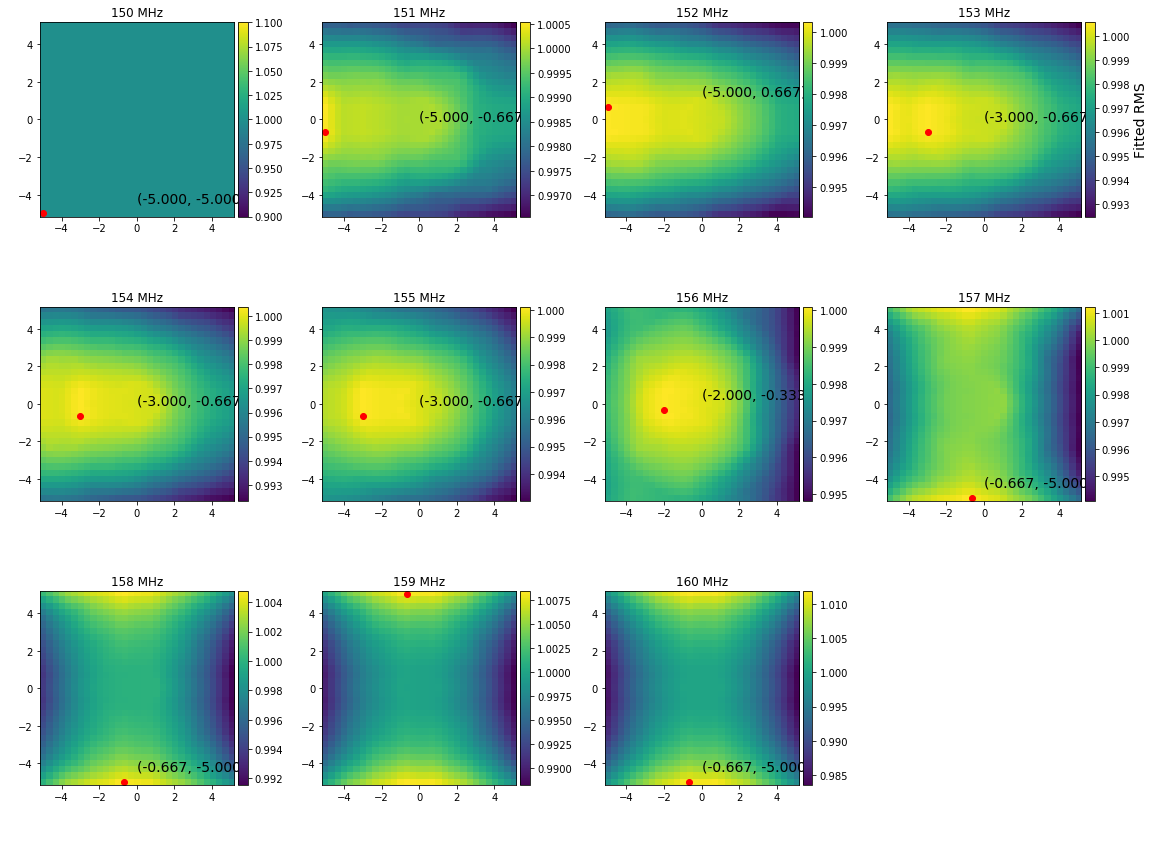

In [31]:
fig = figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4)
imgs = []

for i,freq in enumerate(freqs):
    ax = fig.add_subplot(gs[i])
    imgs.append(ax.imshow(beam_grid[i].reshape([npix_side]*2), extent=extent_lm))
    max_ind = np.argmax(beam_grid[i])
    row_ind = max_ind/npix_side
    col_ind = max_ind%npix_side
    ax.scatter(np.rad2deg(L[row_ind, col_ind]), np.rad2deg(M[row_ind, col_ind]), c='r', marker='o')
    text = '(%.3f, %.3f)' %(np.rad2deg(ls[col_ind]), np.rad2deg(ms[row_ind]))
    ax.annotate(text, np.rad2deg((0, ms[row_ind]+0.01)), fontsize=14)
    ax.set_title('%.0f MHz' %freq)

for i,ax in enumerate(fig.axes):
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cb = fig.colorbar(imgs[i], cax=cax)
    if i == (nplots - 1):
        if opts.log_scale:
            cb.set_label('log10(Fitted RMS)', size=fontsize)
        else:
            cb.set_label('Fitted RMS', size=fontsize)

gs.tight_layout(fig)
# gs.update(wspace=0.15)

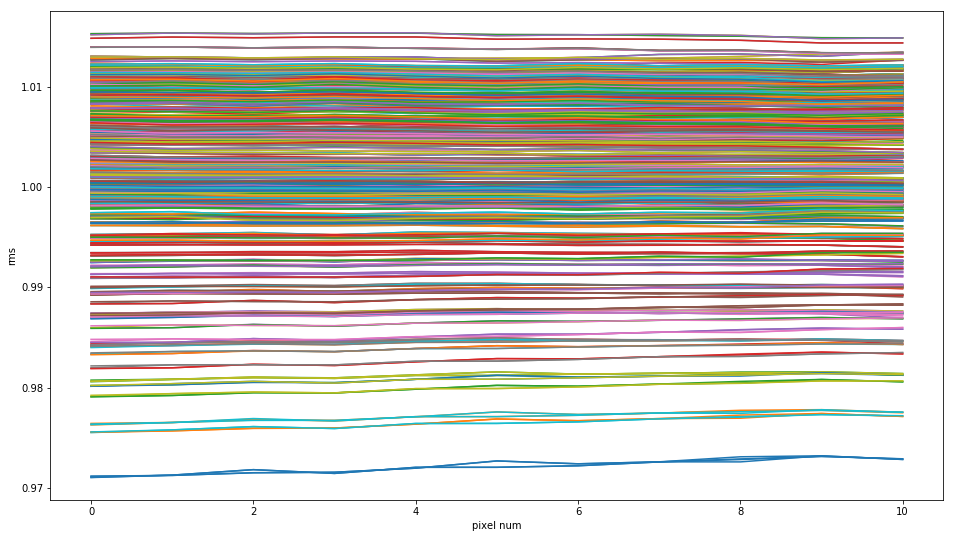

In [37]:
figure(figsize=(16, 9))
for i in range(nlm):
    plot(np.arange(nfreqs), np.abs(a)[:, i])
    xlabel('pixel num')
    ylabel('rms')

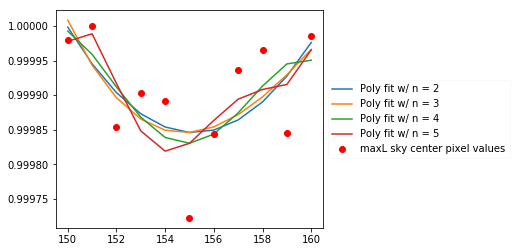

In [36]:
middle_pixel = npix_side**2/2
for n in range(2, 6):
    fit_coeffs = np.polyfit(freqs, np.abs(a), n)
    curve = np.zeros_like(freqs)
    for j in range(n + 1):
        curve += fit_coeffs[j, middle_pixel]*freqs**(n - j)
    plot(freqs, curve, label='Poly fit w/ n = %d' %n)
plot(freqs, np.abs(a)[:, middle_pixel], 'ro', label='maxL sky center pixel values')

ax = gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, framealpha=0.1)
# legend(loc='best', fancybox=True, framealpha=0.1)